<a href="https://colab.research.google.com/github/MarinaFedorovaok/CQuarter1/blob/master/retail_data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.	Визуализация данных в matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('Online Retail.csv', sep = ';', parse_dates = ['InvoiceDate'])  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Проверяем как загрузились данные (вывод первых, последних и слуайно выбранных строк).

In [3]:
data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,NaN


In [4]:
data.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541906,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,NaN
541907,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,NaN
541908,C581484,23843,PAPER CRAFT . LITTLE BIRDIE,-80995,2011-09-12 09:27:00,2.08,16446.0,United Kingdom,NaN


In [5]:
data.sample(3, random_state = 123)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
344102,562932,21219,SET/4 BADGES BALLOON GIRL,2,2011-10-08 16:39:00,1.25,16904.0,United Kingdom,NaN
181320,581233,23455,SMALL PARLOUR PICTURE FRAME,6,2011-08-12 10:33:00,2.89,13436.0,United Kingdom,NaN
486278,552000,21802,CHRISTMAS TREE HEART DECORATION,1,2011-05-05 15:56:00,0.42,NaN,United Kingdom,NaN


Удаляем "лишний" столбец.

In [6]:
df = data.drop(columns = ['Unnamed: 8'])

In [7]:
df['Quantity'] = df['Quantity'].astype('int')
df['CustomerID'] = df['CustomerID'].astype('str')
df['UnitPrice'] = df['UnitPrice'].astype('float')
df['Country'] = df['Country'].astype('category')

In [8]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom


In [9]:
df['revenue'] = df['Quantity']*df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceD'] = df['InvoiceDate'].dt.date
df['Invoicedayofweek'] = df['InvoiceDate'].dt.dayofweek
df['InvoiceMonth'].value_counts()

11    73594
10    56920
9     51289
7     47097
6     46119
8     44887
5     42659
1     39769
3     38669
4     37180
2     33841
12    29885
Name: InvoiceMonth, dtype: int64

In [10]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,InvoiceMonth,InvoiceD,Invoicedayofweek
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.6,9,2011-09-12,0


In [17]:
table = pd.pivot_table(df, index=['InvoiceD'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum, min, max],
                        'Quantity': np.mean})
table

Quantity   revenue                                       
                 mean       max       mean  median       min       sum
InvoiceD                                                              
2010-01-12   8.627413   1627.20  18.866010   8.420    -41.40  58635.56
2010-02-12   9.968231   1576.80  21.909569  13.200   -403.20  46207.28
2010-03-12   6.734787   1314.00  20.717738   8.455   -367.20  45620.46
2010-05-12   6.016514    525.60  11.517046   5.100   -175.60  31383.95
2010-06-12   5.523208   1627.20  13.888649   6.720   -151.20  53860.18
...               ...       ...        ...     ...       ...       ...
2011-12-06   8.820465    833.25  11.612893   6.300     -8.95  12483.86
2011-12-07   8.254349   1305.60  15.532118   6.630    -76.50  25892.04
2011-12-08  10.661319  11062.06   8.956756  12.600 -11062.06  10049.48
2011-12-09  10.038778    270.00  17.061874  12.500    -39.60  29039.31
2011-12-10   7.079343    320.00  13.361993  10.080   -114.00  29302.85

[305 rows x 6 columns]

In [18]:
table[('revenue','sum')]

InvoiceD
2010-01-12    58635.56
2010-02-12    46207.28
2010-03-12    45620.46
2010-05-12    31383.95
2010-06-12    53860.18
                ...   
2011-12-06    12483.86
2011-12-07    25892.04
2011-12-08    10049.48
2011-12-09    29039.31
2011-12-10    29302.85
Name: (revenue, sum), Length: 305, dtype: float64

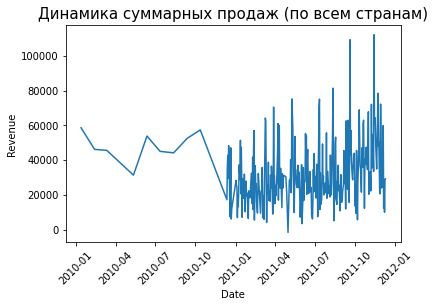

In [22]:
plt.plot(table[('revenue','sum')])
plt.title('Динамика суммарных продаж (по всем странам)', size = 15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation = 45);

In [23]:
table = pd.pivot_table(df, index=['InvoiceMonth'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum, min, max],
                        'Quantity': np.mean})
table[('revenue','sum')]

InvoiceMonth
1      666383.670
2      588718.820
3      757679.970
4      660149.571
5      765153.270
6      799112.520
7      888950.281
8      759822.560
9     1045087.582
10     989257.070
11    1297606.420
12     529826.200
Name: (revenue, sum), dtype: float64

In [42]:
m = table[('revenue', 'sum')].median()
m

762487.915

In [51]:
lst = len(table['revenue', 'sum']+1)
median_all = [m for i in range(lst+1)]

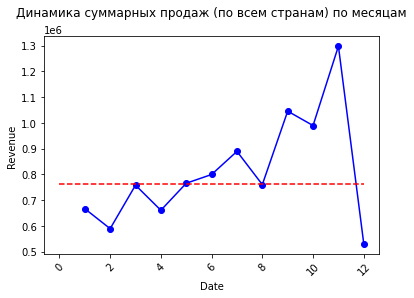

In [52]:
plt.plot(table[('revenue','sum')], 'bo')
plt.plot(table[('revenue','sum')], 'b-')
# m= df['revenue'].median()
plt.plot(median_all, 'r--')
plt.title('Динамика суммарных продаж (по всем странам) по месяцам', pad=20)# 
plt.xlabel('Date')
plt.ylabel('Revenue')#size=20
plt.xticks(rotation = 45);

Исследуем продажи по странам

In [60]:
table_countries = pd.pivot_table(df[df['Country'] != 'United Kingdom'], index=['Country'], #df[df['Country'] != 'United Kingdom']
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum],
                        'Quantity': np.mean})
table_countries.sort_values(by=[('revenue','sum')], ascending=False).head(10)
lst_top_10 = list((table_countries.sort_values(by=[('revenue','sum')], ascending=False).head(10)).index)
lst_top_10

['Netherlands',
 'EIRE',
 'Germany',
 'France',
 'Australia',
 'Switzerland',
 'Spain',
 'Belgium',
 'Sweden',
 'Japan']

In [54]:
table_countries[table_countries[('revenue','sum')] > df['revenue'].median()]

Quantity     revenue                  
                           mean        mean median        sum
Country                                                      
Australia             66.444003  108.877895  51.84  137077.27
Austria               12.037406   25.322494  17.00   10154.32
Bahrain               13.684211   28.863158  25.50     548.40
Belgium               11.189947   19.773301  16.60   40910.96
Brazil                11.125000   35.737500  19.65    1143.60
Canada                18.298013   24.280662  16.50    3666.38
Channel Islands       12.505277   26.499063  17.70   20086.29
Cyprus                10.155949   20.813971  16.20   12946.29
Czech Republic        19.733333   23.590667  25.30     707.72
Denmark               21.048843   48.247147  23.40   18768.14
EIRE                  17.403245   32.122599  17.34  263276.82
European Community     8.147541   21.176230  17.70    1291.75
Finland               15.346763   32.124806  17.85   22326.74
France                12.911067   23.069288  16.50  197403.90
Germany               12.369458   23.348943  16.60  221698.21
Greece                10.657534   32.263836  16.60    4710.52
Hong Kong             16.559028   35.128611  23.40   10117.04
Iceland               13.505495   23.681319  17.00    4310.00
Israel                14.656566   26.625657  17.85    7907.82
Italy                  9.961395   21.034259  17.40   16890.51
Japan                 70.441341   98.716816  61.20   35340.62
Lebanon                8.577778   37.641778  31.60    1693.88
Lithuania             18.628571   47.458857  45.00    1661.06
Malta                  7.433071   19.728110  17.00    2505.47
Netherlands           84.406580  120.059696  91.80  284661.54
Norway                17.722836   32.378877  19.80   35163.46
Poland                10.712610   21.152903  17.40    7213.14
Portugal              10.651745   19.333127  15.80   29367.02
RSA                    6.068966   17.281207  16.50    1002.31
Saudi Arabia           7.500000   13.117000  17.70     131.17
Singapore             22.855895   39.827031  34.80    9120.39
Spain                 10.589814   21.624390  15.00   54774.58
Sweden                77.136364   79.211926  30.00   36595.91
Switzerland           15.147353   28.164510  17.40   56385.35
USA                    3.553265    5.948179  10.50    1730.92
United Arab Emirates  14.441176   27.974706  20.40    1902.28
Unspecified            7.399103   10.649753   8.80    4749.79

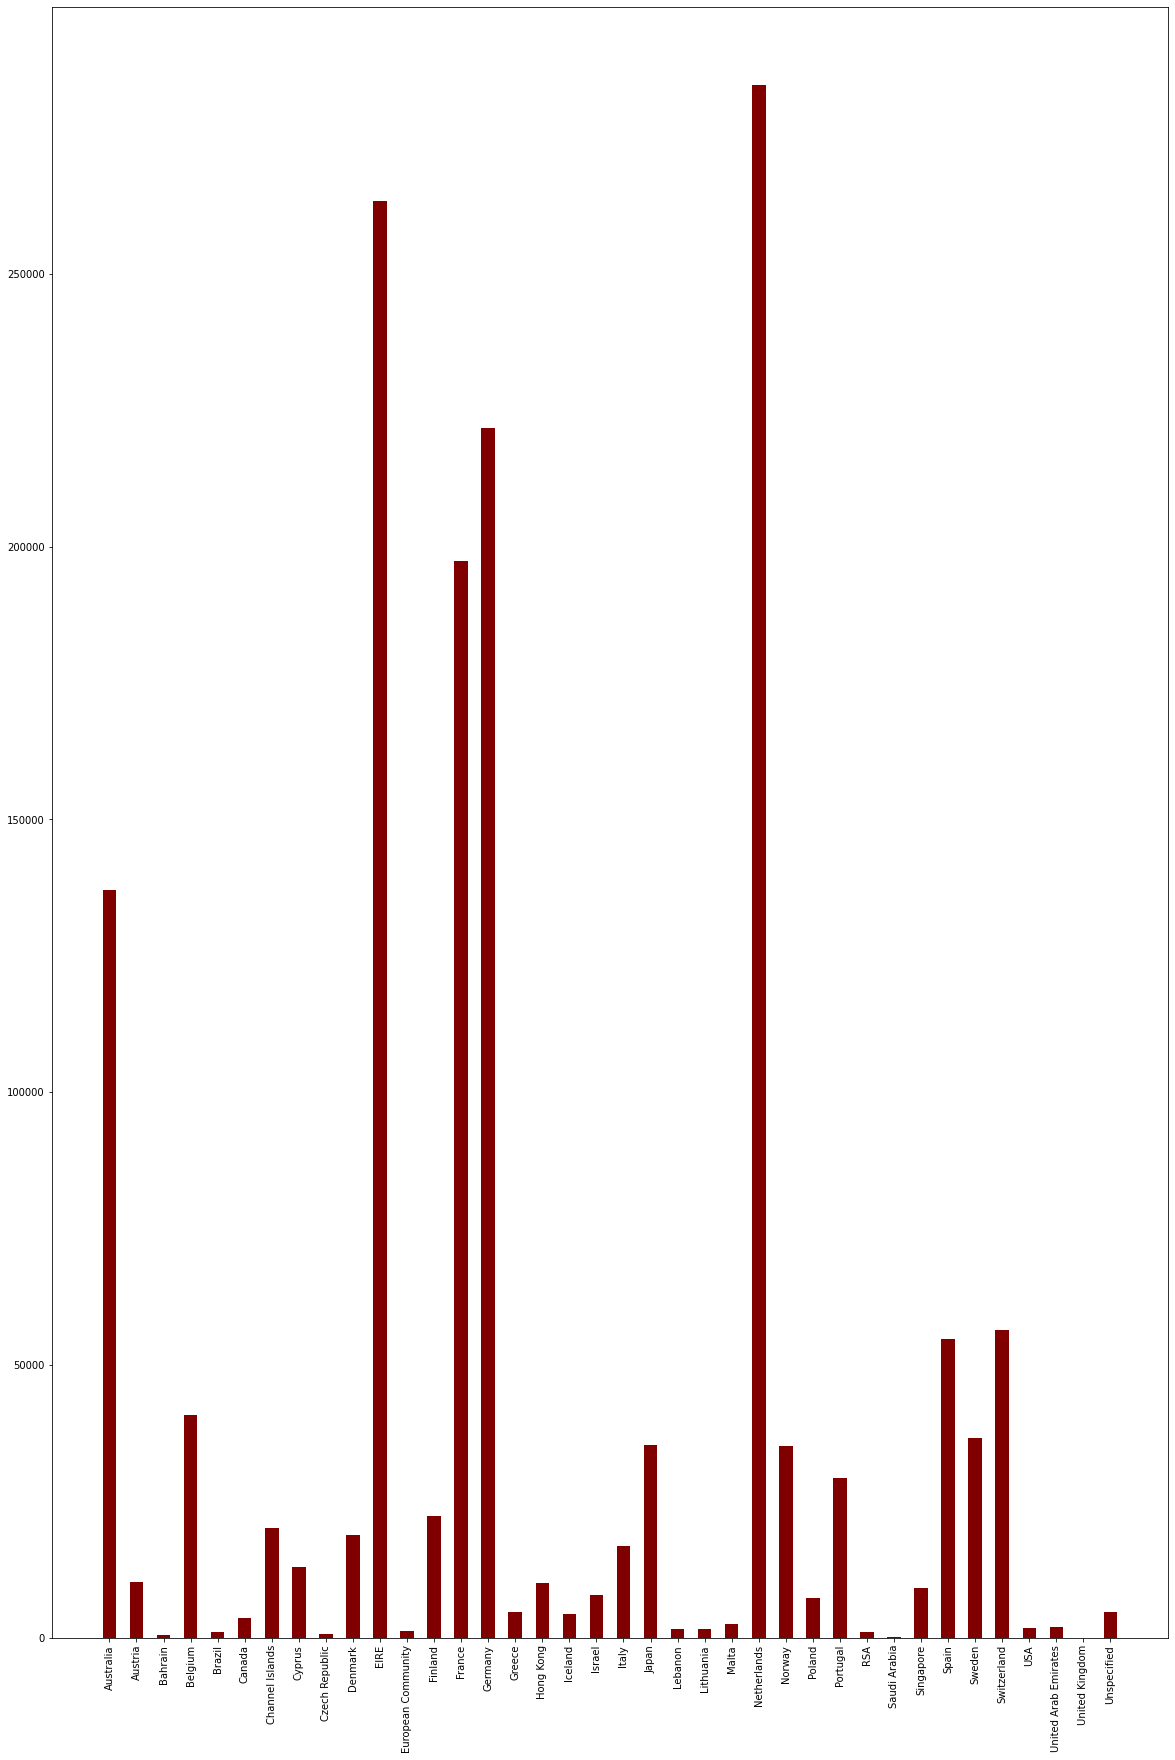

In [61]:
plt.figure(figsize=(20,30))
plt.bar(table_countries.index, table_countries[('revenue','sum')], color ='maroon',
        width = 0.5)
plt.xticks(rotation = 90)
plt.show()

In [62]:
countries_top = table_countries.sort_values(by=[('revenue','sum')], ascending=False).head(10)
countries_top

Quantity     revenue                  
                  mean        mean median        sum
Country                                             
Netherlands  84.406580  120.059696  91.80  284661.54
EIRE         17.403245   32.122599  17.34  263276.82
Germany      12.369458   23.348943  16.60  221698.21
France       12.911067   23.069288  16.50  197403.90
Australia    66.444003  108.877895  51.84  137077.27
Switzerland  15.147353   28.164510  17.40   56385.35
Spain        10.589814   21.624390  15.00   54774.58
Belgium      11.189947   19.773301  16.60   40910.96
Sweden       77.136364   79.211926  30.00   36595.91
Japan        70.441341   98.716816  61.20   35340.62

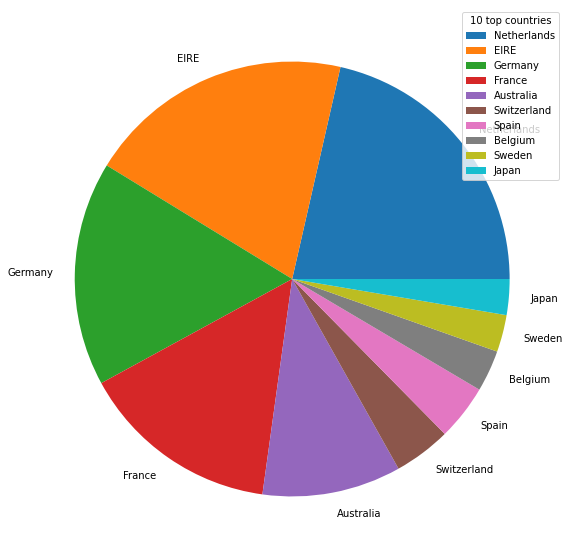

In [63]:
plt.figure(figsize=(10,10))
mylabels = list(countries_top.index)
plt.pie(countries_top[('revenue','sum')], labels = mylabels)
plt.legend(title = "10 top countries", loc='upper right')
plt.show()

In [64]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,InvoiceMonth,InvoiceD,Invoicedayofweek
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.6,9,2011-09-12,0


In [ ]:
df[df['Country'].isin(list(countries_top.index))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,InvoiceMonth,InvoiceD,Invoicedayofweek
20,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,4992.00,10,2011-10-27,3
25,579498,23084,RABBIT NIGHT LIGHT,2040,2011-11-29 15:52:00,1.79,12798.0,Japan,3651.60,11,2011-11-29,1
41,572052,22595,GINGHAM HEART DECORATION,1728,2011-10-20 12:26:00,0.72,14646.0,Netherlands,1244.16,10,2011-10-20,3
50,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-09-12 10:44:00,2.55,12755.0,Japan,3794.40,9,2010-09-12,6
56,536890,17084R,ASSORTED INCENSE PACK,1440,2010-03-12 11:48:00,0.16,14156.0,EIRE,230.40,3,2010-03-12,4
...,...,...,...,...,...,...,...,...,...,...,...,...
541727,C579090,84598,BOYS ALPHABET IRON ON PATCHES,-288,2011-11-28 10:48:00,0.21,12427.0,Germany,-60.48,11,2011-11-28,0
541728,C571499,72802C,VANILLA SCENT CANDLE JEWELLED BOX,-288,2011-10-17 15:07:00,1.25,12454.0,Spain,-360.00,10,2011-10-17,0
541730,C562375,22950,36 DOILIES VINTAGE CHRISTMAS,-288,2011-04-08 14:46:00,1.25,14911.0,EIRE,-360.00,4,2011-04-08,4
541796,C564899,M,Manual,-480,2011-08-31 11:31:00,0.22,14646.0,Netherlands,-105.60,8,2011-08-31,2


In [65]:
len(df[df['Country'].isin(list(countries_top.index))])

37302

In [ ]:
print('Top 10 стран составляют {:.2%} выручки.'.format(len(df[df['Country'].isin(list(countries_top.index))])/len(df)))

Top 10 стран составляют 6.88% выручки.


In [66]:
def revenue_Country(df, name_country):
  df_country = df[df['Country'] == name_country]
  table_country = pd.pivot_table(df_country,index=['CustomerID'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum],
                        'Quantity': np.mean})
  print('Число клиентов в стране {} равно {}.'.format(name_country, len(table_country)))

  table_date = pd.pivot_table(df_country,index=['InvoiceD'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum],
                        'Quantity': np.mean})
  table_month = pd.pivot_table(df_country,index=['InvoiceMonth'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum],
                        'Quantity': np.mean})
  
  plt.plot(table_month[('revenue','sum')])
  plt.xticks(rotation=45)
  return table_country, table_month

Число клиентов в стране Germany равно 95.


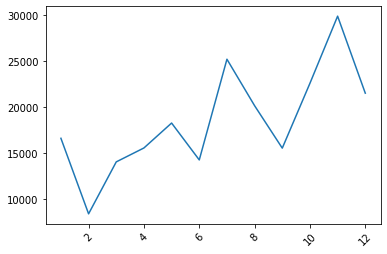

In [67]:
table_country, table_month = revenue_Country(df, 'Germany')

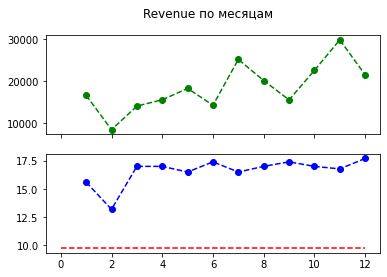

In [ ]:
lst = len(table_month[('revenue','sum')]+1)
m = df['revenue'].median()
median_all = [m for i in range(lst+1)]

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Revenue по месяцам')
ax1.plot(table_month[('revenue','sum')], 'g--')
ax1.plot(table_month[('revenue','sum')], 'go')
ax2.plot(table_month[('revenue','median')], 'b--')
ax2.plot(table_month[('revenue','median')], 'bo')
ax2.plot(median_all, 'r--');

In [ ]:
table_cl = pd.pivot_table(df[df['Country'] == 'United Kingdom'],index=['CustomerID'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum],
                        'Quantity': np.mean})
table_month = pd.pivot_table(df[df['Country'] == 'United Kingdom'],index=['InvoiceMonth'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum],
                        'Quantity': np.mean})

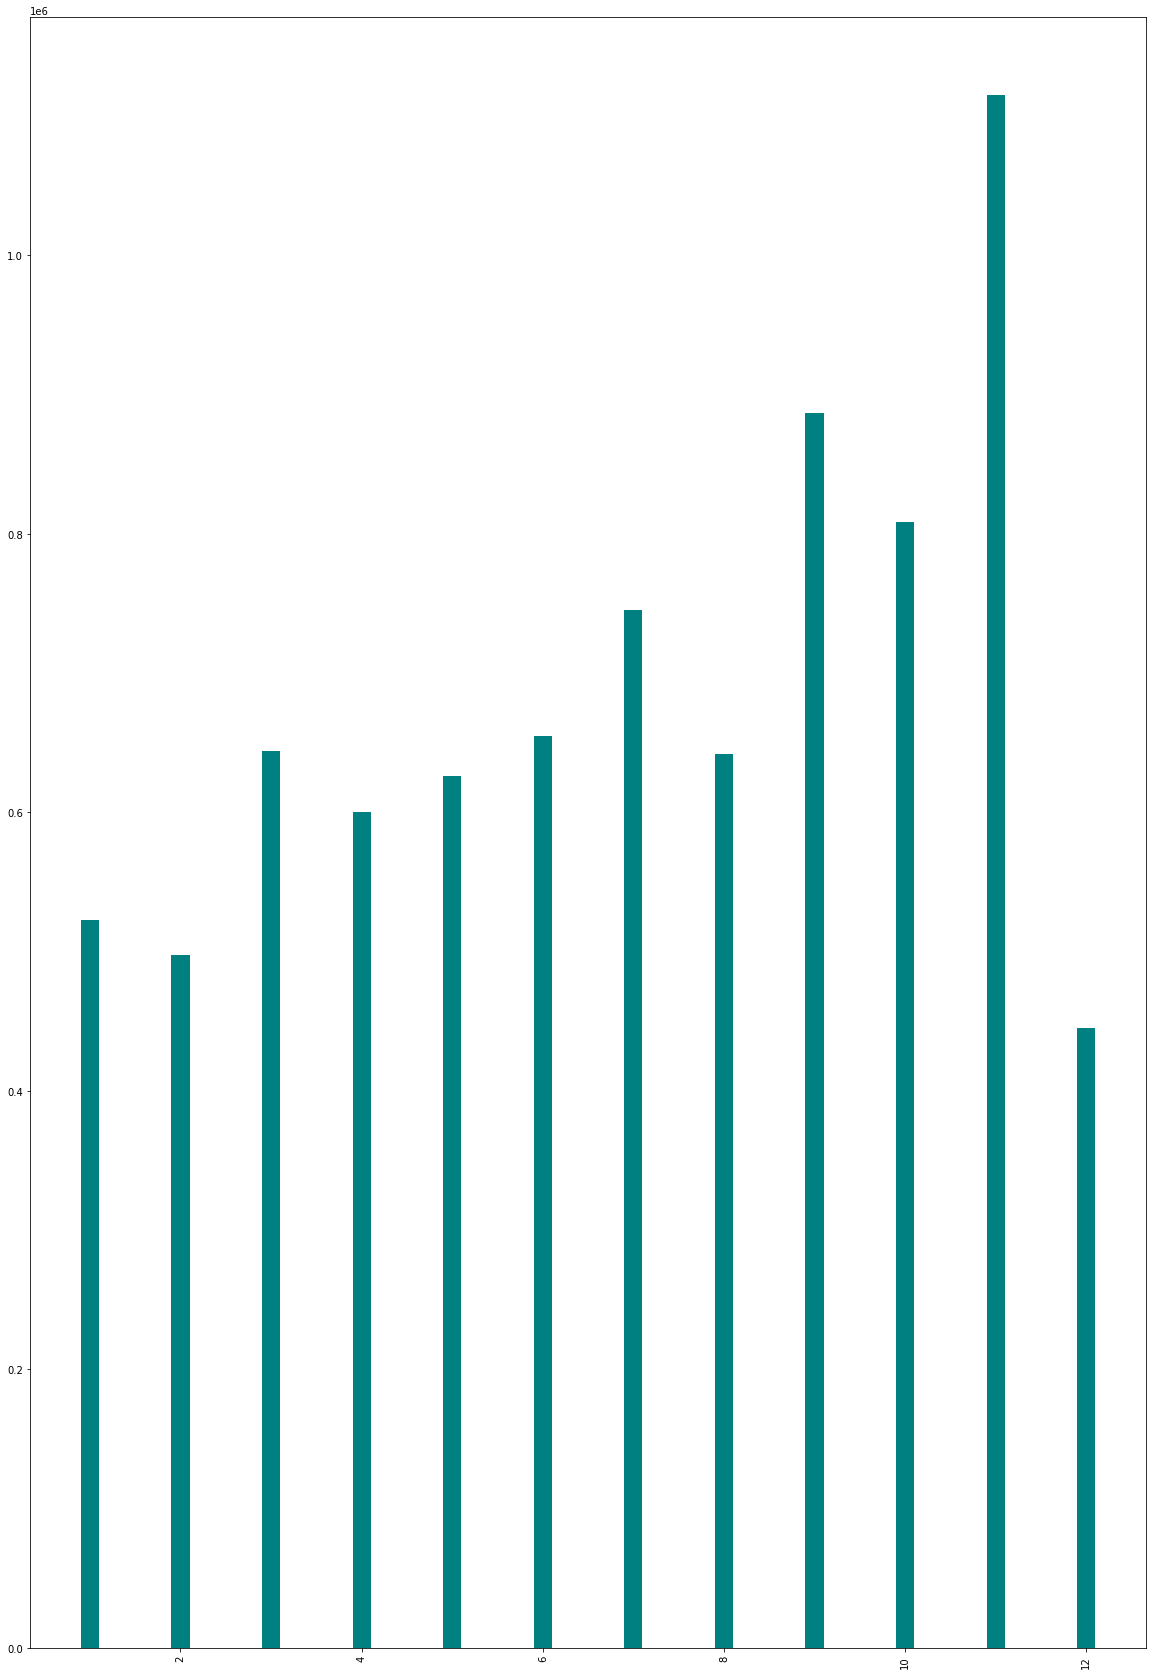

In [ ]:
plt.figure(figsize=(20,30))
plt.bar(table_month.index, table_month[('revenue','sum')], color ='teal',
        width = 0.2)
plt.xticks(rotation = 90)
plt.savefig('UK_month.jpg')
plt.show()

# Новый раздел

In [68]:
df.corr()

,Quantity,UnitPrice,revenue,InvoiceMonth,Invoicedayofweek
Quantity,1.000000,-0.001235,0.886681,-0.000702,-0.001908
UnitPrice,-0.001235,1.000000,-0.162029,-0.000917,-0.005002
revenue,0.886681,-0.162029,1.000000,0.000226,-0.002834
InvoiceMonth,-0.000702,-0.000917,0.000226,1.000000,-0.029663
Invoicedayofweek,-0.001908,-0.005002,-0.002834,-0.029663,1.000000
